# Прототип алгоритма «Solution Existence Detection» (часть 3, масштабирование)

In [1]:
import numpy as np

Готовая функция для построения схемы алгоритма SED:

In [ ]:
def get_SED_scheme(P_min, N):
    def get_j(k, dir, P_of_0, n, N):
        if dir == 'up':
            return (2*np.pi*(k-1)+np.arccos(2*P_of_0-1))/(2*np.arcsin(np.sqrt(n/N)))
        elif dir == 'down':
            return (2*np.pi*k-np.arccos(2*P_of_0-1))/(2*np.arcsin(np.sqrt(n/N)))
    def get_n(k, dir, j, P_of_0, N):
        if dir == 'up':
            return N*np.sin((2*np.pi*(k-1)+np.arccos(2*P_of_0-1))/(2*j))**2
        elif dir == 'down':
            return N*np.sin((2*np.pi*k-np.arccos(2*P_of_0-1))/(2*j))**2
    js = []
    n = 1
    while True:
        j = int(np.ceil(get_j(k=1, dir='up', P_of_0=1-P_min, N=N, n=n)))
        js.append(j)
        if j == 1:
            break
        n = int(np.floor(get_n(k=1, dir='down', j=j, P_of_0=1-P_min, N=N)))
    return js

Утилита для построения графиков:

In [3]:
import plotly.graph_objects as go
import plotly.io as pio

pio.renderers.default = 'svg'

def show(data, title="Picture", marker_size=3):
    fig = go.Figure()

    for g in data:

        xy = g[0]
        color = g[1]
        opacity = 1
        if len(g) == 3:
            opacity = g[2]

        fig.add_trace(go.Scatter(
            x=[i[0] for i in xy],
            y=[i[1] for i in xy],
            mode='markers',
            marker_color=color,
            opacity=opacity
        ))

    fig.update_traces(mode='markers', marker_size=marker_size)
    fig.update_layout(title=title, yaxis_zeroline=False, xaxis_zeroline=False)

    fig.show()

# А что если q сильно больше?

Допустим мы переводим в суперпозицию 50 кубит.

In [4]:
q = 50
N = 2 ** q
N

1125899906842624

In [5]:
P_min = 0.2

Число итераций усиления амплитуды для достижения вероятности $P_{min}$:

In [6]:
j_P_min = (1/2) * (np.arcsin(np.sqrt(P_min)) / np.arcsin(np.sqrt(1/N)) - 1)
j_P_min = int(np.ceil(j_P_min))
j_P_min

7778716

Число итераций усиления амплитуды для достижения вероятности $\approx 1$:

In [7]:
j_P_is_1 = (1/2) * (np.arcsin(np.sqrt(1)) / np.arcsin(np.sqrt(1/N)) - 1)
j_P_is_1 = int(np.ceil(j_P_is_1))
j_P_is_1

26353589

In [8]:
scheme = get_SED_scheme(P_min=P_min, N=N)
scheme

[15557433, 2708202, 469075, 81215, 14062, 2435, 422, 74, 13, 3, 1]

Итераций:

In [9]:
sum(scheme)

18832935

Дополнительных кубит:

In [10]:
len(scheme) + 1

12

In [11]:
def get_P_of_0(j, n, N):
    return (1 + np.cos(2 * j * np.arcsin(np.sqrt(n / N)))) / 2

def get_P_of_0_complex(js, n, N):
    p = 1
    for j in js:
        p *= get_P_of_0(j, n, N)
    return 1 - p

In [12]:
limit = 1000
step = int(N / limit)

rlts = []

for j in scheme:

    R = []
    for n in [0, 1, *list(range(1, N, step)), N]:
        p = get_P_of_0_complex([j], n, N)
        R.append((n, p))

    rlts.append(R)

C = []

for n in [0, 1, *list(range(1, N, step)), N]:
    p = get_P_of_0_complex(scheme, n, N)
    C.append((n, p))

rlts.append(C)

datasets = [[[(x[0], x[1]) for x in C], 'blue', 0.5] for C in rlts]
datasets[-1][1] = 'red'
datasets[-1][2] = 1

show(datasets, marker_size=2)

**Примечание:** следует изучить схему, в которой контролироваться будут только операторы диффузии.

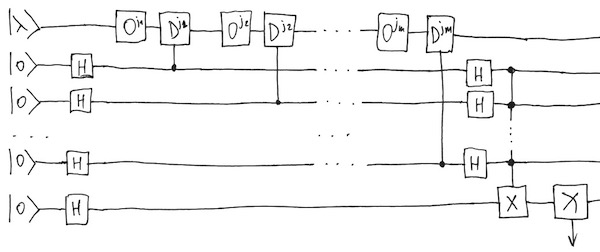